<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Cleaning</a></span></li><li><span><a href="#Data-set-description" data-toc-modified-id="Data-set-description-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Data set description</a></span></li></ul></li><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 3</a></span></li><li><span><a href="#Question-4" data-toc-modified-id="Question-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question 4</a></span></li><li><span><a href="#Question-5" data-toc-modified-id="Question-5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Question 5</a></span><ul class="toc-item"><li><span><a href="#Q5.1,--First-solution-(right-side-of-tree)-(In-Camino,-fill-in-the-seaborn-command-you-used-to-draw-the-chart)" data-toc-modified-id="Q5.1,--First-solution-(right-side-of-tree)-(In-Camino,-fill-in-the-seaborn-command-you-used-to-draw-the-chart)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Q5.1,  First solution (right side of tree) (In Camino, fill in the seaborn command you used to draw the chart)</a></span></li><li><span><a href="#Q5.2,-Second-solution-(left-side-of-tree)-(In-Camino,-fill-in-the-seaborn-command-you-used-to-draw-the-chart)" data-toc-modified-id="Q5.2,-Second-solution-(left-side-of-tree)-(In-Camino,-fill-in-the-seaborn-command-you-used-to-draw-the-chart)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Q5.2, Second solution (left side of tree) (In Camino, fill in the seaborn command you used to draw the chart)</a></span></li></ul></li></ul></div>

# OMIS 114 - Homework 6

The goal of this homework is to use decision trees to find what factors are associated with survival from the Titanic sinking in 1912.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

In [7]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Cleaning

We will start by cleaning the data set. This part is already done for you. So, you should just execute the code below.

In [14]:
df = pd.read_csv("titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Drop extra attributes.

In [17]:
df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)

Create binary variable for gender.

In [20]:
df['Male'] = df.Sex == 'male'

In [22]:
df.drop(['Sex'], axis=1, inplace=True)

Make dummy variables for embarkation.

In [25]:
df.Embarked.unique()
df = pd.get_dummies(data=df,columns=['Embarked'])

array(['S', 'C', 'Q', nan], dtype=object)

Remove the nulls

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Male        891 non-null    bool   
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 45.4 KB


In [30]:
df.isna().any()

Survived      False
Pclass        False
Age            True
SibSp         False
Parch         False
Fare          False
Male          False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [32]:
df.Age.isna().sum()

177

In [34]:
len(df)

891

In [36]:
df.dropna(inplace=True)

In [38]:
len(df)

714

In [40]:
len(df) + 177 == 891

True

In [42]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,False,True
1,1,1,38.0,1,0,71.2833,False,True,False,False
2,1,3,26.0,0,0,7.9250,False,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,False,True


### Data set description
After cleaning, we have a DataFrame df, which reports the passengers of the Titanic (one row per passenger). The columns are:
<ul>
<li><b>Survived</b>: binary attribute that indicates whether the passenger survived. This is the dependent variable that we will attempt to explain
<li><b>Pclass</b>: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
<li><b>Age</b>: Passenger age
<li><b>SibSp</b>: The amout of the passenger's siblings/spouses aboard the Titanic
<li><b>Parch</b>: The amout of the passenger's parents/children aboard the Titanic
<li><b>Fare</b>: The ticket fare
<li><b>Male</b>: binary attibute that indicates the gender (1=Male, 0=Female)
<li><b>Embarked_C</b>: binary attibute that indicates whether the passenger embarked in Cherbourg
<li><b>Embarked_Q</b>: binary attibute that indicates whether the passenger embarked in Queenstown
<li><b>Embarked_S</b>: binary attibute that indicates whether the passenger embarked in Southampton
</ul>

## Question 1

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 1</b> (i.e., one root and two leaf nodes) to find the differences between those who survived and those who didn't. (In Camino, identify which attribute was selected to split the data on)

In [47]:
X = df.drop(columns='Survived')

In [49]:
Y = df.Survived

In [51]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [53]:
dt = tree.DecisionTreeClassifier(max_depth=1)

In [55]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

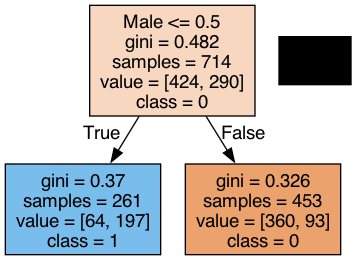

In [59]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]

tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  

graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

## Question 2

In **at most 10 words**, explain what the decision tree tells us. Write your answer in a markdown cell. (In Camino, fill the same sentence into the blank)

The decision tree just tells us that males had a lower survival probability because: 
Root Node (Overall Dataset):
- value = [424, 290] indicates:
- 424 samples in class 0 (e.g., not survived).
- 290 samples in class 1 (e.g., survived).

Left Branch (True: Male <= 0.5, likely females):
- Samples: 261 individuals.
- Value = [64, 197]:
- 64 individuals are in class 0 (not survived).
- 197 individuals are in class 1 (survived).
- Conclusion: The majority (197 out of 261) survived. This suggests that females (Male <= 0.5) had a higher survival probability.

Right Branch (False: Male > 0.5, likely males):
- Samples: 453 individuals.
- Value = [360, 93]:
- 360 individuals are in class 0 (not survived).
- 93 individuals are in class 1 (survived).
- Conclusion: The majority (360 out of 453) did not survive. This suggests that males (Male > 0.5) had a lower survival probability.

## Question 3

Use **one** seaborn command to draw a bar chart which helps to <b>visually</b> validate what you found in the previous question. (In Camino, fill in the program code line you used) 

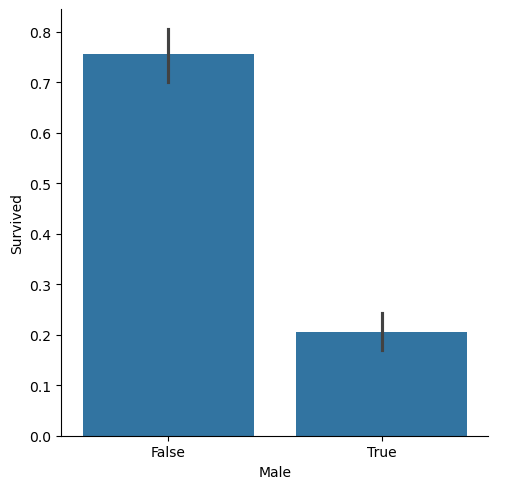

In [68]:
sns.catplot(x = 'Male', y = 'Survived', kind = 'bar', data = df)

## Question 4

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 2</b> to find the differences between those who survived and those who didn't. Your tree should have four leaves. (In Camino, pick the 3 attributes/predictors decision tree used to build the tree.)

In [70]:
dt_new = tree.DecisionTreeClassifier(max_depth = 2)

In [72]:
dt_new.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

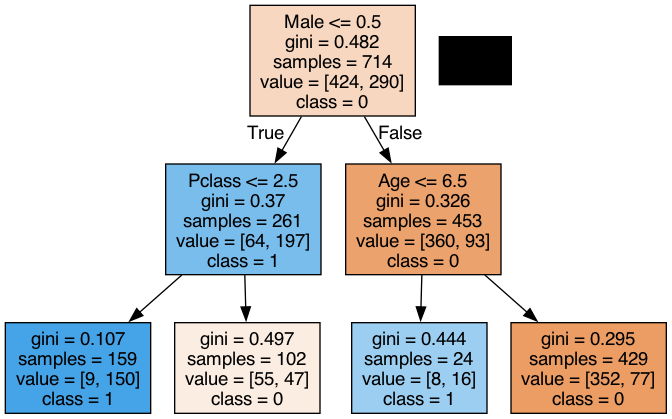

In [76]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_new_feature_names = list(X.columns)
dt_new_target_names = [str(s) for s in Y.unique()]

tree.export_graphviz(dt_new, out_file='tree.dot', 
    feature_names = dt_new_feature_names, class_names=dt_new_target_names,
    filled=True)  

graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

## Question 5

The tree found in your previous question should involve three predictors. Based on what the tree tells you, detect an interesting finding involving <b>two</b> of these three predictors and show its validity through seaborn. 
<p><b>Format and grading:</b> For this question, you will be graded on <b>the noted markdown and code cell</b> following this cell</b>. The first cell following this cell must be a markdown cell with your finding written in English. The second cell must contain the code that builds a seaborn chart: this chart must <b>visually</b> validate your finding. 

### Q5.1,  First solution (right side of tree) (In Camino, fill in the seaborn command you used to draw the chart)

Markdown cell:

Generally, females survived more than males in all cases. Even when age was less than or equal to 6.5.  

Code cell:

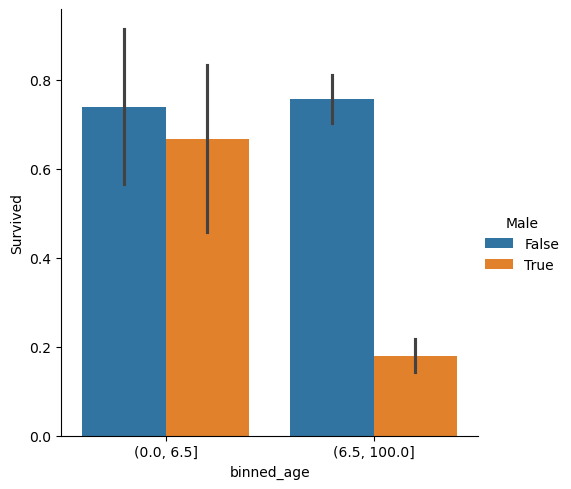

In [101]:
df['binned_age'] = pd.cut(df.Age,bins=[0,6.5,100])
sns.catplot(x = df['binned_age'], y = 'Survived', data = df, kind = 'bar', hue = 'Male')

### Q5.2, Second solution (left side of tree) (In Camino, fill in the seaborn command you used to draw the chart)

Markdown cell:

In [ ]:
Comparison of Survival Probabilities: 
- Females in first or second class (Pclass <= 2.5): Survival probability = 150 / 159 ≈ 94.3 %
- Females in third class (Pclass > 2.5): Survival probability = 47 / 102 ≈ 46.1 % 

Code cell:

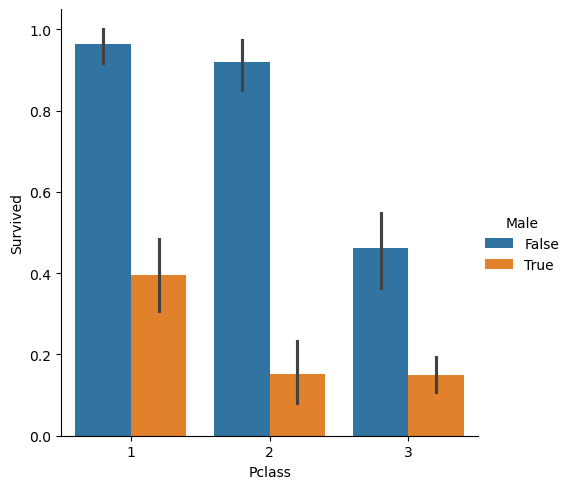

In [109]:
sns.catplot(x = 'Pclass', y = 'Survived', data = df, kind = 'bar', hue = 'Male')